# K-nearest neighbours

In [131]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix
import random

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Class'] = iris.target

In [23]:
def eucladian_distance(p1,p2):
    return np.linalg.norm(p1 - p2)

In [326]:
k = 4 #number of nearest neighbours
grid_size = 10

# Using only sepal length (cm) sepal width (cm)
# create a grid:
max_length = max(iris_df['sepal length (cm)'])
min_length = min(iris_df['sepal length (cm)'])
max_width = max(iris_df['sepal width (cm)'])
min_width = min(iris_df['sepal width (cm)'])


length = np.linspace(min_length-0.5, max_length+0.5, grid_size)
width = np.linspace(min_width-0.5, max_width+0.5, grid_size)

classification_grid = 10*np.ones(shape=(grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size): 
        p1 = [length[i], width[j]]
        for n in range(len(iris_df)):
            p2 = np.array(iris_df['sepal length (cm)'][n], iris_df['sepal width (cm)'][n]).copy()
            distance.append([eucladian_distance(p1, p2), n])
        distance.sort()
        #Get the indexes for k nearest neighbours
        knn_index = np.array(distance)[:k,1].copy()
        distance = []

        #Get the labels for knn
        knn_labels = [iris_df['Class'][index] for index in knn_index]

        # Calculate class
        classes = {np.sum(np.sum(np.array(knn_labels)==0)):0, np.sum(np.sum(np.array(knn_labels)==1)):1, np.sum(np.sum(np.array(knn_labels)==2)):2}
       
        winning = max(classes.keys()).copy()
            
        classification_grid[j][i] =  classes[winning]
    
            

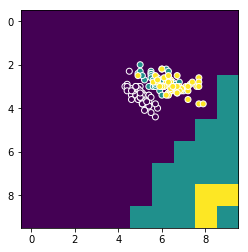

In [334]:
fig,ax = plt.subplots()

#ax.set_xlim([min_length-0.5,max_length+0.5])
#ax.set_ylim([min_width-0.5,max_width+0.5])
#ax.set_xticks(length)
#ax.set_yticks(width)
ax.imshow(classification_grid)#, extent=[min_length-0.5, max_length+0.5,min_width-0.5, max_width+0.5])


color = ['r','g','b']
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'],c=iris.target,edgecolors='white')

In [319]:
type(classes[winning])

int

In [332]:
length

array([3.8       , 4.31111111, 4.82222222, 5.33333333, 5.84444444,
       6.35555556, 6.86666667, 7.37777778, 7.88888889, 8.4       ])